In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1)
%matplotlib inline

In [3]:
# URL to dataset
dataUrl = 'https://raw.githubusercontent.com/kug3lblitz/Heat-Replay/master/src/data/final/final.csv'

# Load the dataset
df = pd.read_csv(dataUrl)

In [6]:
# Check head
df.head(10)

,year,decade,unique_words,density,unique_words_raw,density_raw,nouns,verbs,adjectives,syllables,most_used_term,most_used_freq,curses,total_curses,reading_score,sentiment,charted
0,1961,1960,36,72,65,158,34,30,10,70,rose,7,0,0,2.367848,0.9943,0
1,1961,1960,45,91,74,197,45,37,19,81,name,6,0,0,2.771777,0.9712,1
2,1961,1960,54,103,88,223,45,48,17,98,babi,10,0,0,3.885650,0.9974,1
3,1961,1960,42,148,66,263,81,61,36,76,love,24,0,0,2.889886,0.9993,1
4,1961,1960,28,131,60,354,56,77,5,57,come,38,0,0,2.940000,0.9812,1
5,1961,1960,50,105,79,181,39,40,24,80,mari,13,0,0,3.135470,0.9612,1
6,1961,1960,39,75,70,160,28,35,21,81,take,13,0,0,3.503750,0.9978,1
7,1961,1960,50,94,78,190,62,17,8,83,never,6,0,0,3.074737,-0.5659,1
8,1961,1960,53,63,92,166,25,41,18,105,one,4,0,0,4.993855,-0.2263,1
9,1961,1960,48,57,79,124,29,24,7,83,river,5,0,0,4.648387,-0.3400,1


In [8]:
mostUsedTerms = df['most_used_term'].tolist()
mostUsedTerms = (len([i for i in mostUsedTerms if mostUsedTerms.count(i) > 50]))
print mostUsedTerms

974


In [9]:
# Basic descriptions of the distribution of the data
df.describe()

,year,decade,unique_words,density,unique_words_raw,density_raw,nouns,verbs,adjectives,syllables,most_used_freq,curses,total_curses,reading_score,sentiment,charted
count,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000
mean,1991.199795,1986.552254,61.288166,137.016137,93.791496,292.182889,65.571209,64.231301,21.847336,105.648822,15.445184,0.175461,1.178023,4.874880,0.443537,0.580943
std,13.556839,13.559383,35.331564,80.208321,45.511645,168.326983,44.005934,42.659356,17.708684,56.066287,13.698001,0.380410,4.894722,3.527072,0.753897,0.493468
min,1961.000000,1960.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,-3.427959,-0.999700,0.000000
25%,1981.000000,1980.000000,40.000000,84.000000,67.000000,181.000000,36.000000,34.000000,11.000000,72.000000,7.000000,0.000000,0.000000,2.975612,-0.035900,0.000000
50%,1994.000000,1990.000000,53.000000,118.000000,85.000000,256.000000,54.000000,57.000000,17.000000,93.000000,12.000000,0.000000,0.000000,4.161161,0.928700,1.000000
75%,2003.000000,2000.000000,70.000000,165.000000,108.000000,355.000000,81.000000,84.000000,28.000000,121.000000,19.000000,0.000000,0.000000,5.747534,0.987900,1.000000
max,2010.000000,2010.000000,307.000000,638.000000,388.000000,1415.000000,376.000000,346.000000,205.000000,481.000000,234.000000,1.000000,88.000000,84.237399,0.999900,1.000000


In [10]:
# Check the types
df.dtypes

year                  int64
decade                int64
unique_words          int64
density               int64
unique_words_raw      int64
density_raw           int64
nouns                 int64
verbs                 int64
adjectives            int64
syllables             int64
most_used_term       object
most_used_freq        int64
curses                int64
total_curses          int64
reading_score       float64
sentiment           float64
charted               int64
dtype: object

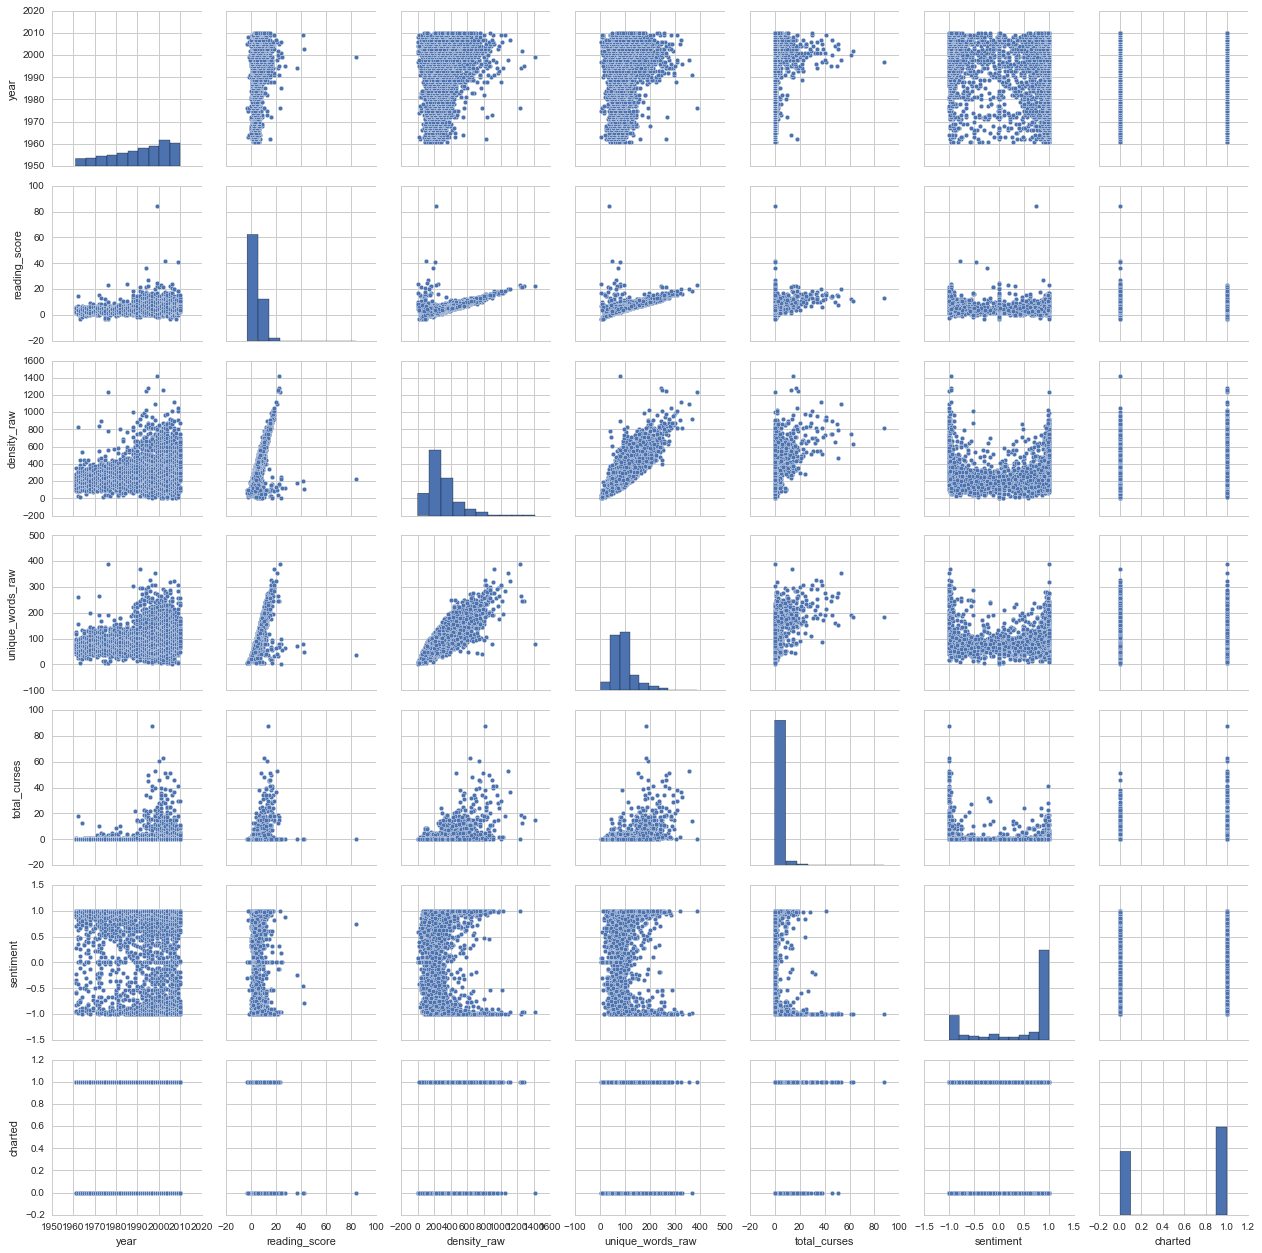

In [11]:
# Get pair plot for major features of the dataset
sns.pairplot(
    df[
        ['year',
         'reading_score', 
         'density_raw', 
         'unique_words_raw', 
         'total_curses', 
         'sentiment', 
         'charted']
    ]
)

In [27]:
# Analyze unnormalized and normalized charted by reading_score

# Get group by counts for unnormalized charted by curses
df_by_score_unnorm = pd.DataFrame()

df_by_score_unnorm['below 3rd grade'] = \
    df[df['reading_score']<3]['charted'].value_counts()
df_by_score_unnorm['above 3rd grade'] = \
    df[df['reading_score']>=3]['charted'].value_counts()

In [7]:
# Get group by counts for normalized charted by reading_score
df_by_score_normed = pd.DataFrame()

df_by_score_normed['below 3rd grade'] = \
    df[df['reading_score']<3]['charted'].value_counts(normalize=True)
df_by_score_normed['above 3rd grade'] = \
    df[df['reading_score']>=3]['charted'].value_counts(normalize=True)

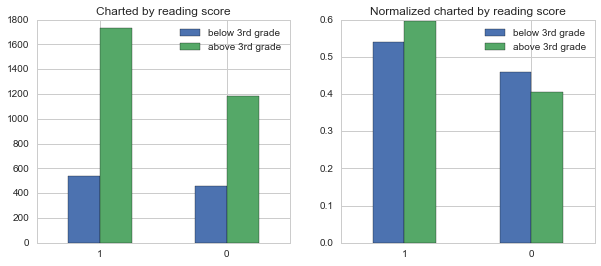

In [8]:
# Plot unnormalized and normalized charted by reading score
fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(121)
df_by_score_unnorm.plot(ax=ax1, kind='bar', rot=0, title="Charted by reading score")

ax2 = fig.add_subplot(122)
df_by_score_normed.plot(ax=ax2, kind='bar', rot=0, title="Normalized charted by reading score")

In [23]:
# Drop the invalid outliers

df = df[df['reading_score']>-3.4]
df = df[df['reading_score']<=15.0]
len(df)

3838

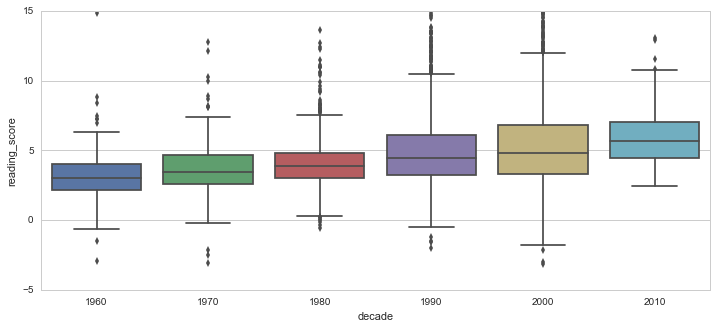

In [24]:
# Quick time series of the unnormalized reading score data points

year = set(df['year'])

# Plot the mean of the reading scores
x, y = zip(
    *sorted(
        (
            xVal, np.median(
                [
                    yVal for av, yVal in zip(
                        df['year'], df['reading_score']
                    ) if xVal==av
                ]
            )
        ) for xVal in year
    )
)

# plt.plot(x, y, 'r-')
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(df['decade'], df['reading_score'], ax=ax)

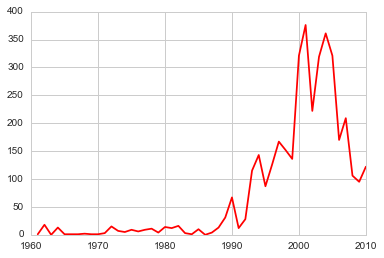

In [29]:
# Quick time series of the unnormalized reading score data points

year = set(df['year'])

# Plot the mean of the reading scores
x, y = zip(
    *sorted(
        (
            xVal, np.sum(
                [
                    yVal for av, yVal in zip(
                        df['year'], df['total_curses']
                    ) if xVal==av
                ]
            )
        ) for xVal in year
    )
)

plt.plot(x, y, 'r-')
# fig, ax = plt.subplots(figsize=(12,5))
# sns.boxplot(df['decade'], df['total_curses'], ax=ax)